<a href="https://colab.research.google.com/github/r-ap/TrainingMachineLearning/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## DATA

In [ ]:
df_bank = pd.read_csv('content/bank/bank-full.csv',sep=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_bank_add = pd.read_csv('content/bank-additional/bank-additional/bank-additional-full.csv',sep=';')
df_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df_bank_add.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df_result_all = pd.concat([df_bank,df_bank_add], axis=0, ignore_index=True)
df_result_all

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86394,73,retired,married,professional.course,no,NaN,yes,no,cellular,NaN,...,999,0,nonexistent,yes,fri,-1.1,94.767,-50.8,1.028,4963.6
86395,46,blue-collar,married,professional.course,no,NaN,no,no,cellular,NaN,...,999,0,nonexistent,no,fri,-1.1,94.767,-50.8,1.028,4963.6
86396,56,retired,married,university.degree,no,NaN,yes,no,cellular,NaN,...,999,0,nonexistent,no,fri,-1.1,94.767,-50.8,1.028,4963.6
86397,44,technician,married,professional.course,no,NaN,no,no,cellular,NaN,...,999,0,nonexistent,yes,fri,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
df_result_all.describe()

,age,balance,day,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,86399.000000,45211.000000,45211.000000,86399.000000,86399.000000,86399.000000,86399.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.501372,1362.272058,15.806419,258.221206,2.670286,479.864616,0.386127,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.534861,3044.765829,8.322476,258.362746,2.947825,483.829445,1.713060,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,246.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,102127.000000,31.000000,4918.000000,63.000000,999.000000,275.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Ambil data Bank Additional karena sekilas data Bank Additional lebih stabil jika dilihat dari mean median dan std nya

In [ ]:
# using df_bank_add
df_result = df_bank_add

In [ ]:
#ubah yes --> 1 dan no --> 0

for ind in df_result.index:
    if df_result['y'][ind] == 'yes':
       df_result['y'][ind] = 1
    else:
       df_result['y'][ind] = 0     

df_result                    

C:\Users\010497\AppData\Local\Temp/ipykernel_17428/1305914603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['y'][ind] = 0
C:\Users\010497\AppData\Local\Temp/ipykernel_17428/1305914603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['y'][ind] = 1


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df_result = df_result.astype({"y": int})

Buat Mapping List untuk Encode value Feature

In [ ]:
# job : 0 = 'unknown', 'management', 'technician', 'entrepreneur', 'blue-collar', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'
# marital : 0 = 'unknown',  1 = 'single', 2 = 'married', 3 = 'divorced' 
# education : 0 = 'unknown', 'tertiary', 'secondary', 'primary', 'basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'illiterate'
# default : 0 = 'unknown', 1 = 'no', 2 ='yes'
# housing : 0 = 'unknown', 1 = 'no', 2 ='yes'
# loan : 0 = 'unknown', 1 = 'no', 2 = 'yes'
# contact : 0 = 'unknown', 1 = 'cellular', 1 = 'telephone'
# month : 1 = 'jan', 2 = 'feb', 3='mar', 4='apr', 5='may', 6='jun', 7='jul', 8='aug', 9='sep', 10='oct', 11='nov', 12='dec' 
# day_of_week : 0 = nan, 1='mon', 2='tue', 3='wed', 4='thu', 5='fri'
# poutcome : 0 = 'unknown', 1='failure', 2='other', 3='success', 4='nonexistent'

dict_job = {
  'unknown': 0, 'management': 1, 'technician': 2,'technician': 3, 'entrepreneur': 4, 'blue-collar': 5, 
  'retired': 6, 'admin.': 7, 'services': 8, 'self-employed': 9, 'unemployed': 10, 'housemaid': 11, 'student': 12
}

dict_marital = {
    'unknown' : 0,  'single' : 1, 'married' : 2, 'divorced' : 3 
}

dict_education ={
    'unknown' : 0, 'tertiary' : 1, 'secondary' : 2, 'primary' : 3, 'basic.4y' : 4, 'high.school': 5, 
    'basic.6y' : 6, 'basic.9y' : 7, 'professional.course' : 8, 'university.degree': 9, 'illiterate' : 10
}

dict_default ={
    'unknown' : 0, 'no' : 1, 'yes' : 2
}

dict_housing ={
    'unknown' : 0, 'no' : 1, 'yes' : 2
}

dict_loan ={
    'unknown' : 0, 'no' : 1, 'yes' : 2
} 

dict_contact ={
    'unknown' : 0, 'cellular' : 1, 'telephone' : 2
} 

dict_month ={
    'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
    'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12 
}

dict_day_of_week = {
    'nan' : 0, 'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5,
    0 :0, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 5    
}

dict_poutcome = {
    'unknown' : 0, 'failure' : 1, 'other' : 2, 'success' : 3, 'nonexistent' : 4
}

In [ ]:
# Function untuk grouping feature menjadi nilai int 
def grouping_feature(df, variable, dict):
   for ind in df.index:
      dic_name = df[variable][ind]
      if dic_name == np.NaN:
         df_result[variable][ind] = 0    
      else:   
         df_result[variable][ind] = int(dict[dic_name])

In [ ]:
grouping_feature(df_result, 'job',dict_job)
grouping_feature(df_result, 'marital',dict_marital)
grouping_feature(df_result, 'education',dict_education)
grouping_feature(df_result, 'default',dict_default)
grouping_feature(df_result, 'housing',dict_housing)
grouping_feature(df_result, 'loan',dict_loan)
grouping_feature(df_result, 'contact',dict_contact)
grouping_feature(df_result, 'month',dict_month)
grouping_feature(df_result, 'poutcome',dict_poutcome)
grouping_feature(df_result, 'day_of_week',dict_day_of_week)


C:\Users\010497\AppData\Local\Temp/ipykernel_17428/2611291783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[variable][ind] = int(dict[dic_name])


In [ ]:
df_result.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
df_result = df_result.astype({"job": int,"marital": int,"education": int,"default": int,"housing": int,"loan": int,"contact": int,"month": int,"y": int, "poutcome":int, "day_of_week": int})

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
X = df_result.drop(columns='y')
y = df_result['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, stratify=y)

<AxesSubplot:>

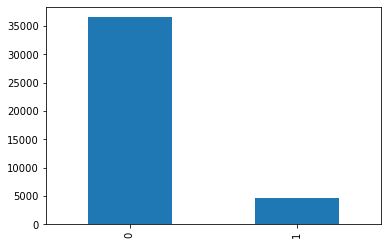

In [ ]:
y.value_counts().plot(kind='bar')

<AxesSubplot:>

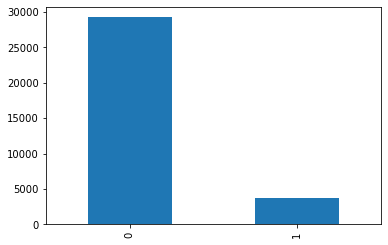

In [ ]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

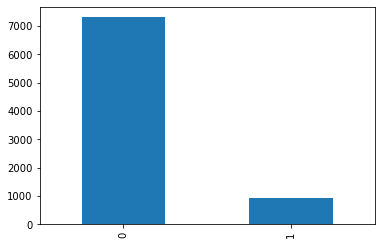

In [ ]:
y_test.value_counts().plot(kind='bar')

### Resampling

- Undersample
- Oversample (SMOTE)

In [ ]:
y_train_0 = y_train[y_train==0]
y_train_1 = y_train[y_train==1]

y_train_0_sample = y_train_0.sample(len(y_train_1))
y_train_sample = pd.concat([y_train_0_sample,y_train_1]).sample(2*len(y_train_1))
y_train_sample

18376    0
15758    0
413      0
2545     0
40207    1
        ..
9187     0
36852    1
26556    0
7920     0
39003    1
Name: y, Length: 7424, dtype: int32

In [ ]:
X_train_sample = X_train.loc[y_train_sample.index]

<AxesSubplot:>

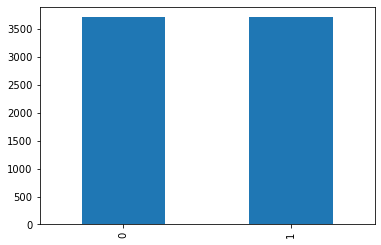

In [ ]:
y_train_sample.value_counts().plot(kind='bar')

In [ ]:
X_train_samp = X_train_sample
y_train_samp = y_train_sample.loc[X_train_samp.index]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_samp)
X_train_scaled = scaler.transform(X_train_samp)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=1)

RF.fit(X_train_samp,y_train_samp)

RandomForestClassifier(max_depth=20)

<AxesSubplot:xlabel='X'>

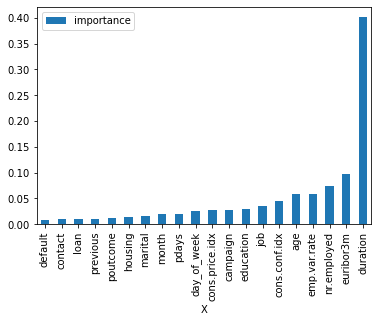

In [ ]:
feature_imp = pd.DataFrame({'X':X.columns,'importance':RF.feature_importances_})
feature_imp.set_index('X').sort_values('importance').plot(kind='bar')

In [ ]:
feature_imp

,X,importance
0,age,0.057762
1,job,0.035017
2,marital,0.015334
3,education,0.028949
4,default,0.008303
5,housing,0.013584
6,loan,0.010069
7,contact,0.009790
8,month,0.020034
9,day_of_week,0.026468


age


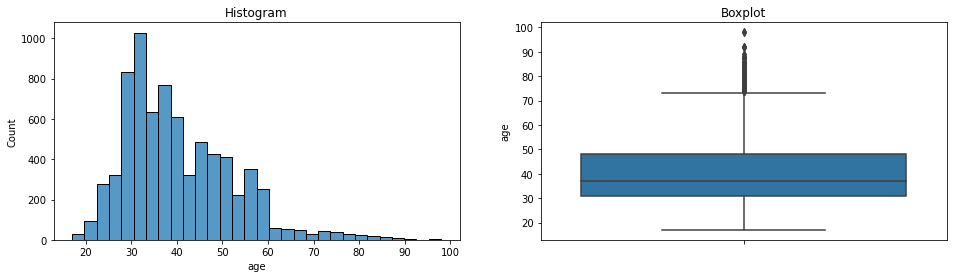

job


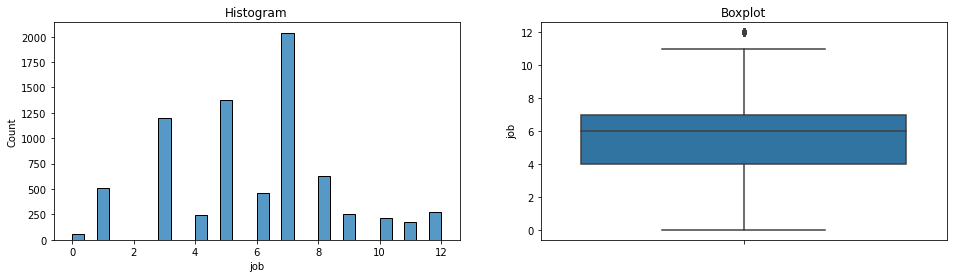

marital


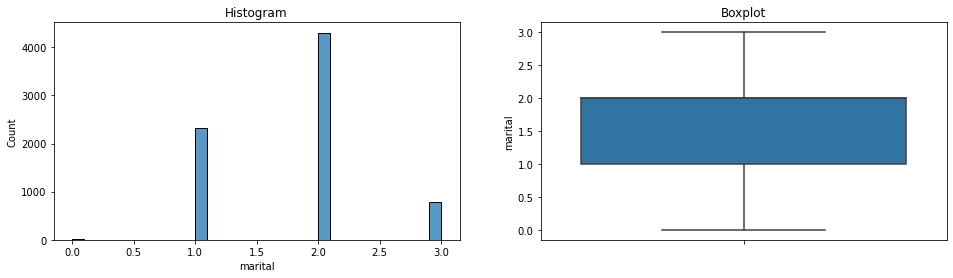

education


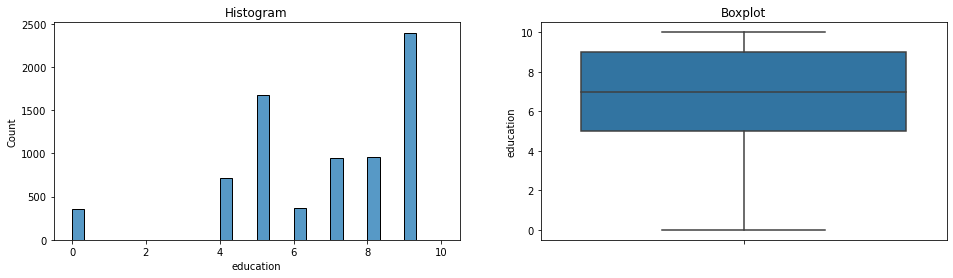

default


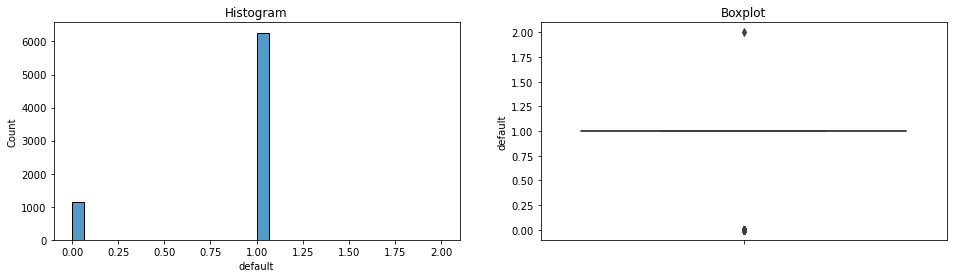

housing


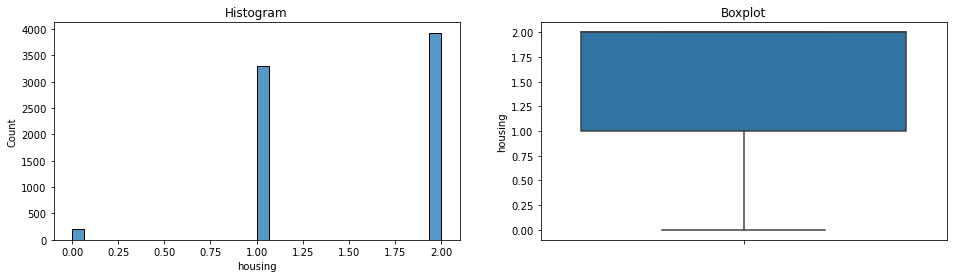

loan


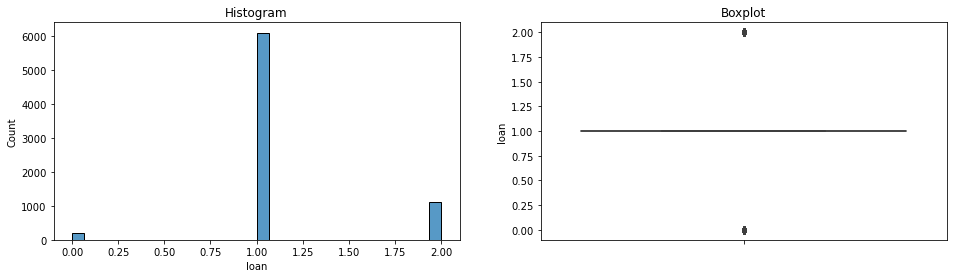

contact


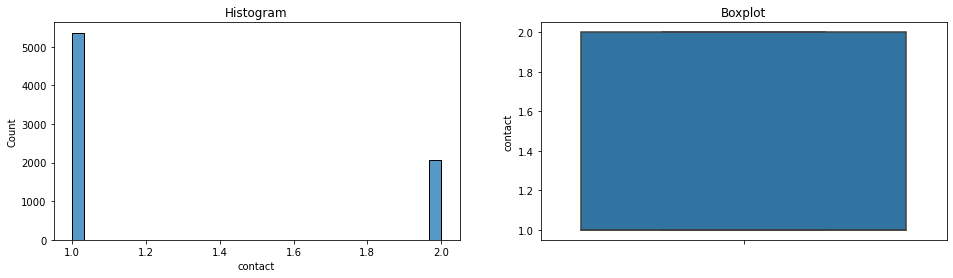

month


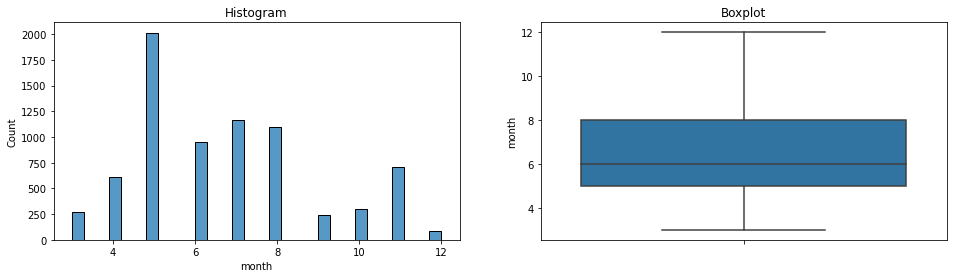

day_of_week


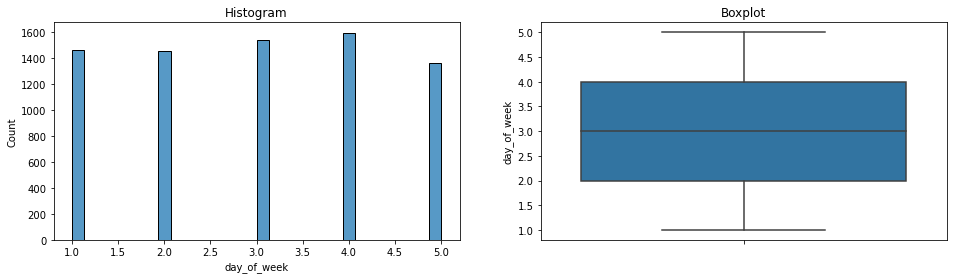

duration


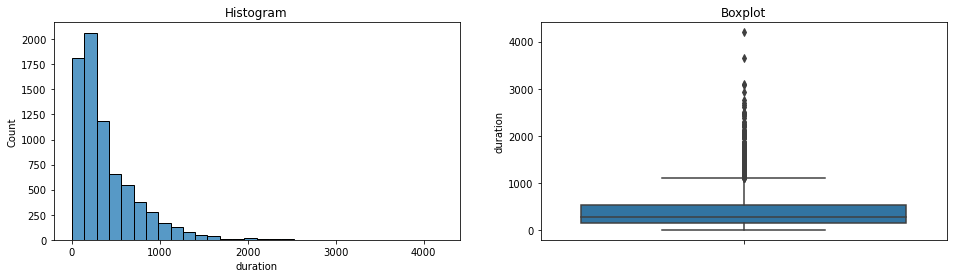

campaign


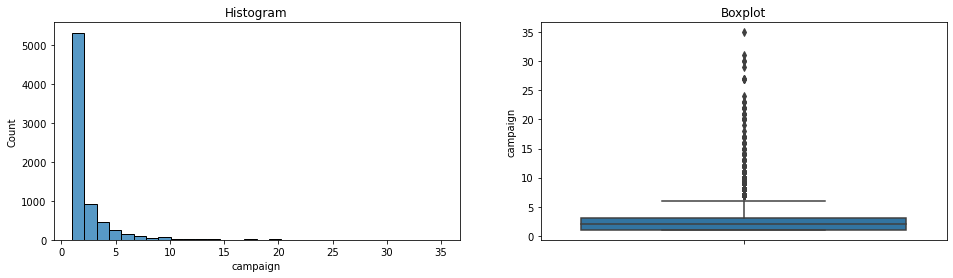

pdays


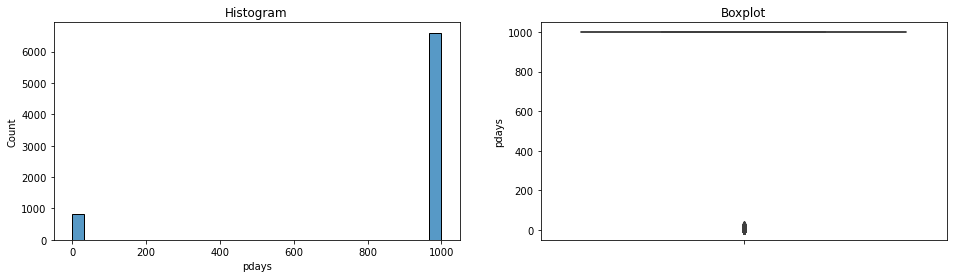

previous


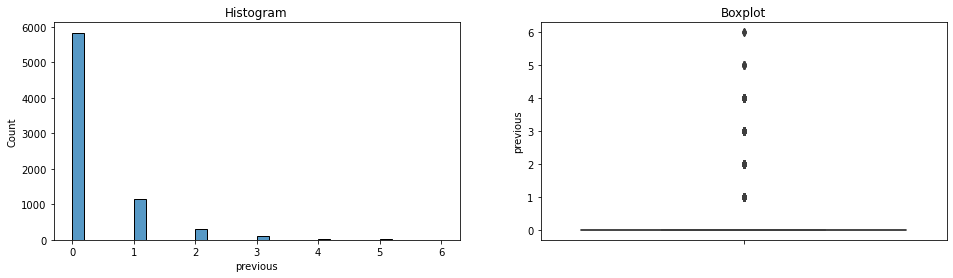

poutcome


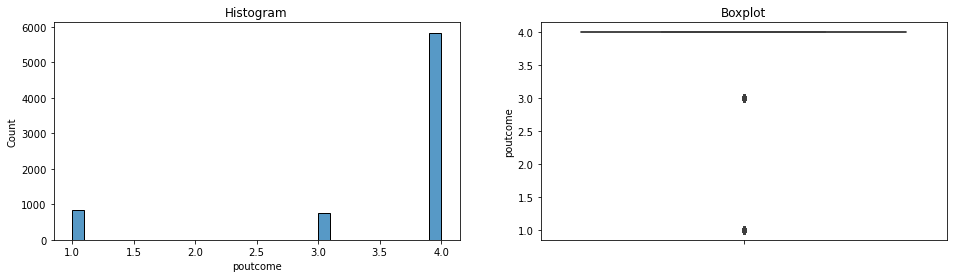

emp.var.rate


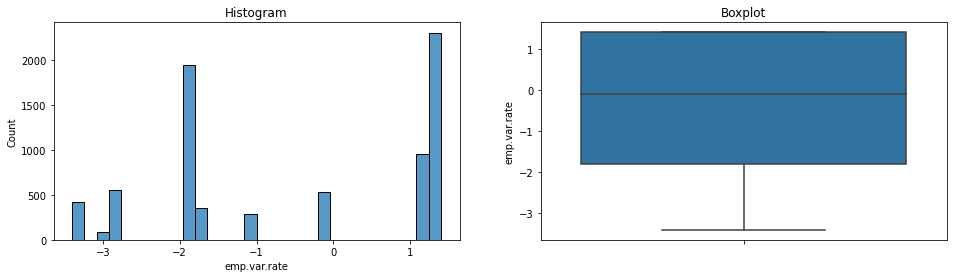

cons.price.idx


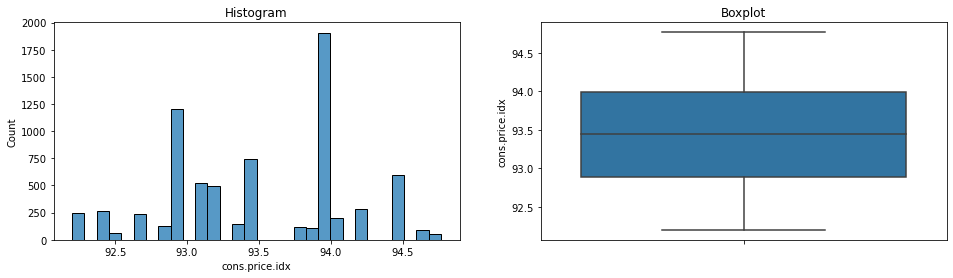

cons.conf.idx


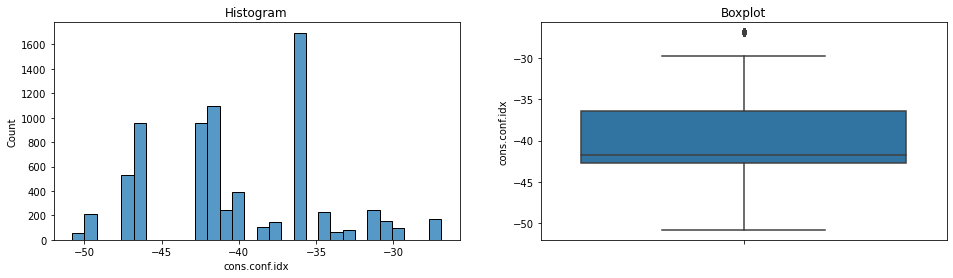

euribor3m


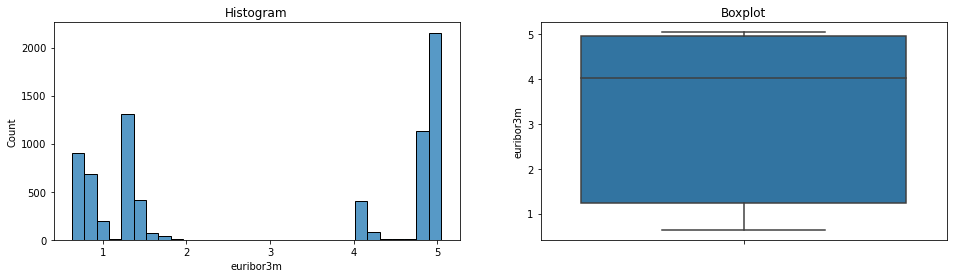

nr.employed


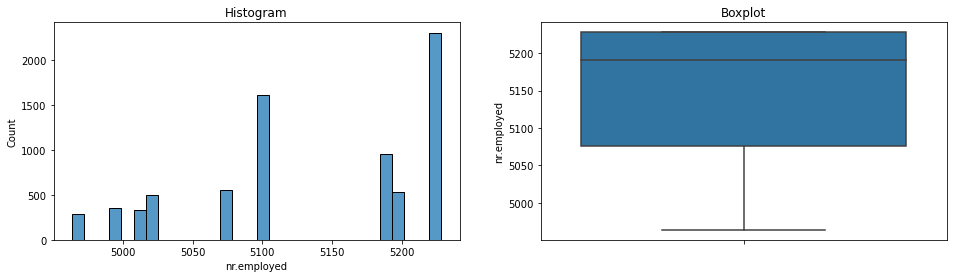

In [ ]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in X_train_sample.columns:
  print (col)
  diagnostic_plots(X_train_sample, col)

In [ ]:
# Delete Feature yg dirasa tidak terkait boxplot tidak ideal (pdays, previous, poutcome, loan, default)
# Delete Feature nilai terlalu rendah <=0.001 (contact, default)

X = df_result.drop(columns=['y','pdays', 'previous', 'poutcome', 'loan', 'default', 'contact'])
y = df_result['y']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, stratify=y)

In [ ]:
y_train_0 = y_train[y_train==0]
y_train_1 = y_train[y_train==1]

y_train_0_sample = y_train_0.sample(len(y_train_1))
y_train_sample = pd.concat([y_train_0_sample,y_train_1]).sample(2*len(y_train_1))
y_train_sample

10977    1
38034    1
2693     0
33939    1
40593    0
        ..
40528    0
32511    0
22737    0
24193    0
40851    1
Name: y, Length: 7424, dtype: int32

<AxesSubplot:>

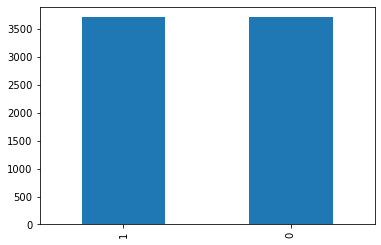

In [ ]:
X_train_sample = X_train.loc[y_train_sample.index]
y_train_sample.value_counts().plot(kind='bar')

age


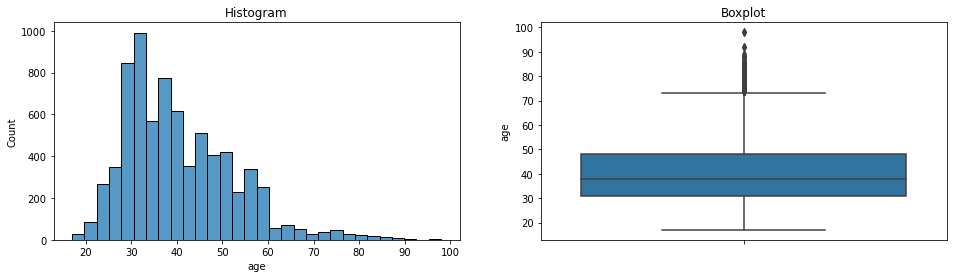

job


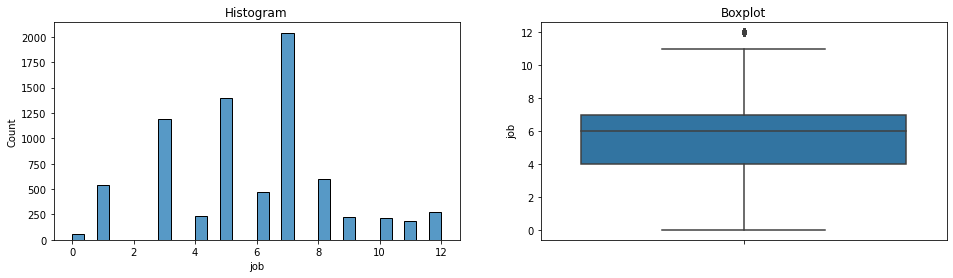

marital


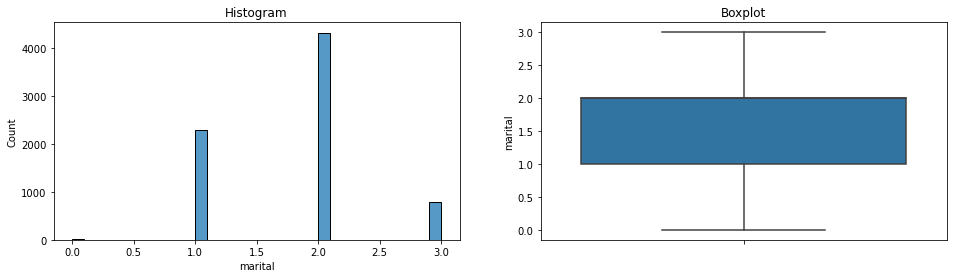

education


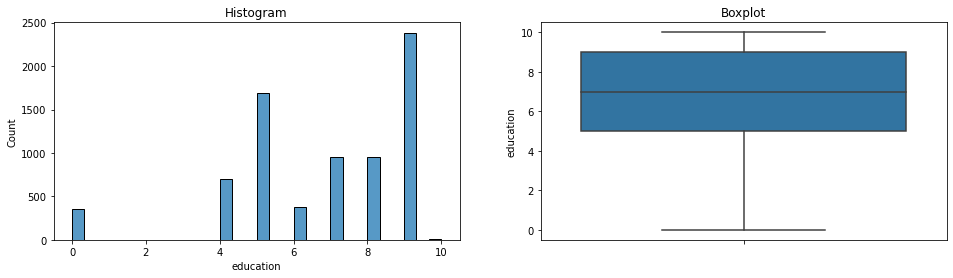

housing


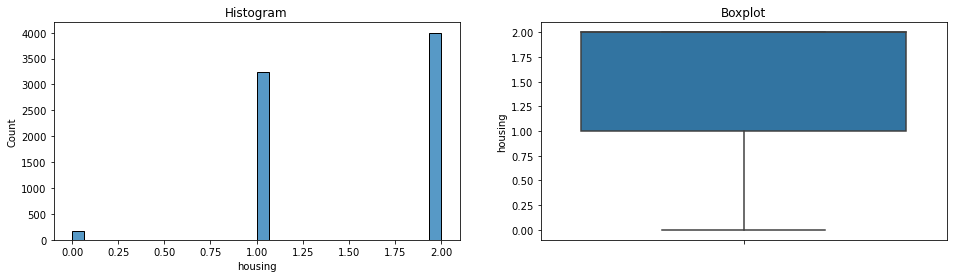

month


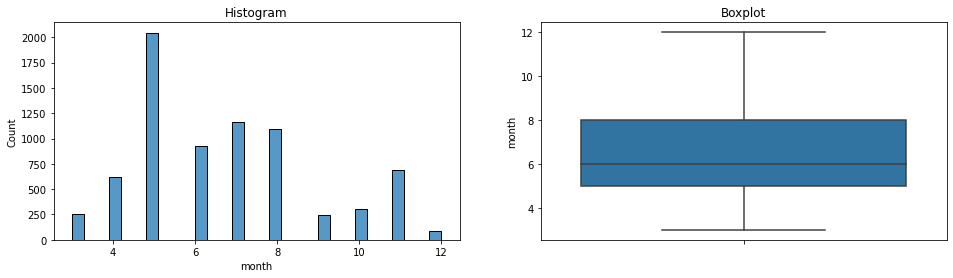

day_of_week


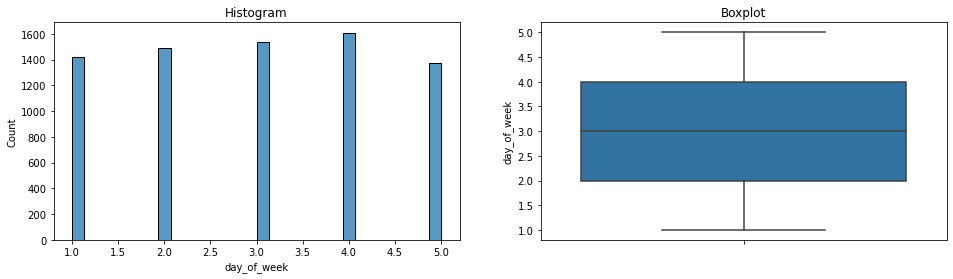

duration


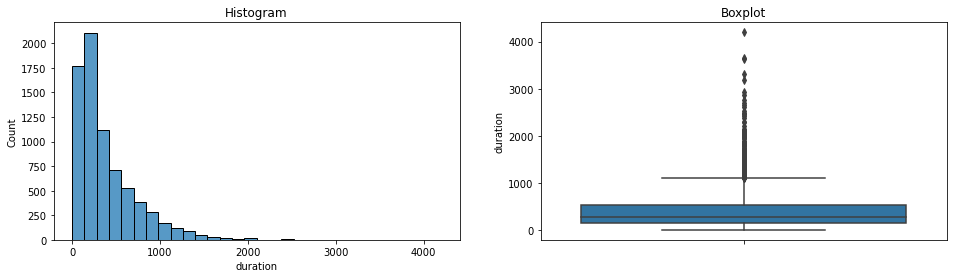

campaign


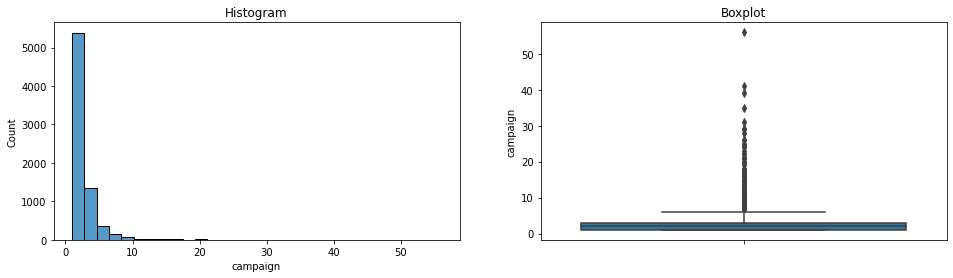

emp.var.rate


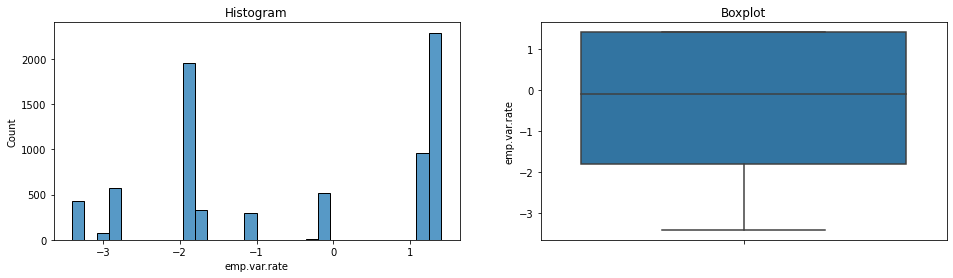

cons.price.idx


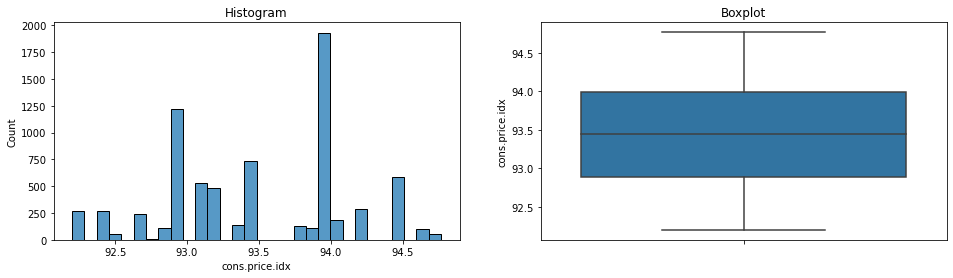

cons.conf.idx


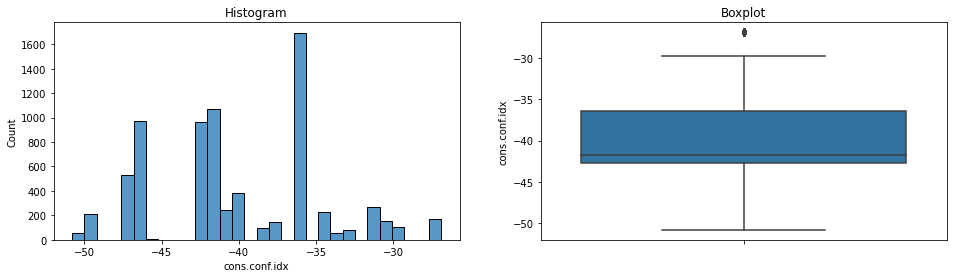

euribor3m


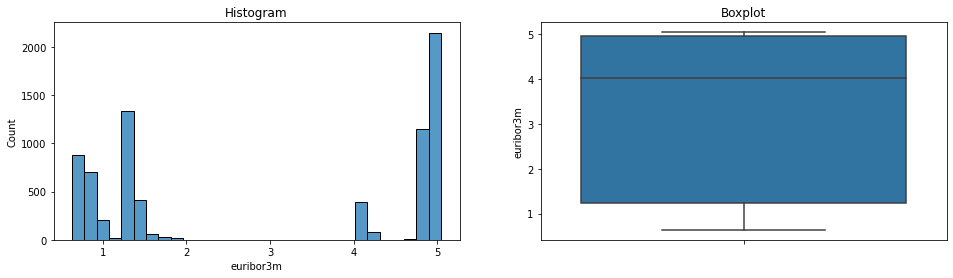

nr.employed


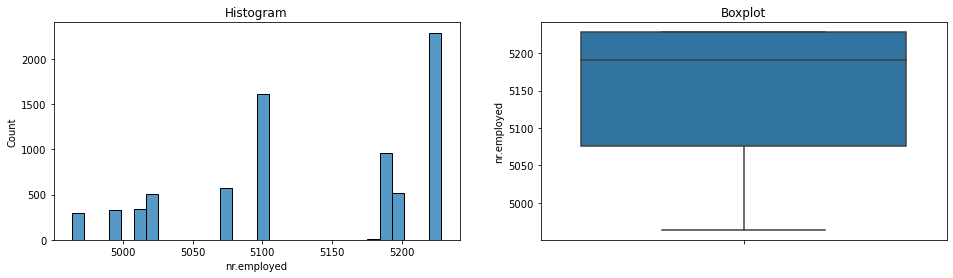

In [ ]:

for col in X_train_sample.columns:
  print (col)
  diagnostic_plots(X_train_sample, col)

In [ ]:
X_train_samp = X_train_sample
y_train_samp = y_train_sample.loc[X_train_samp.index]

In [ ]:
for col in X_train_samp:
  print(f"{col} skewness: {X_train_samp[col].skew()}")

age skewness: 0.9843851759981461
job skewness: 0.12153536570760021
marital skewness: 0.11169168775962679
education skewness: -0.9674728827873664
housing skewness: -0.4996543588594297
month skewness: 0.6064209366306477
day_of_week skewness: -0.020225173248197625
duration skewness: 2.2296637878508783
campaign skewness: 5.9987389607546415
emp.var.rate skewness: -0.16942867546811
cons.price.idx skewness: -0.12003660367639099
cons.conf.idx skewness: 0.3254645112172487
euribor3m skewness: -0.03892714348007411
nr.employed skewness: -0.44228744174485085


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_samp)
X_train_scaled = scaler.transform(X_train_samp)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=14, min_samples_split=2, min_samples_leaf=1)

RF.fit(X_train_samp,y_train_samp)

RandomForestClassifier(max_depth=14)

<AxesSubplot:xlabel='X'>

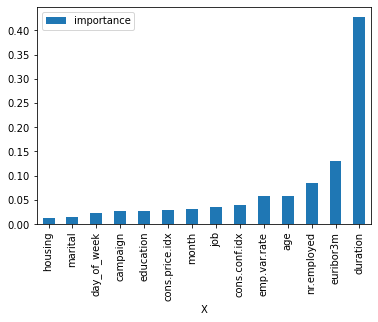

In [ ]:
feature_imp = pd.DataFrame({'X':X.columns,'importance':RF.feature_importances_})
feature_imp.set_index('X').sort_values('importance').plot(kind='bar')

In [ ]:
feature_imp

,X,importance
0,age,0.058658
1,job,0.034659
2,marital,0.015113
3,education,0.027206
4,housing,0.013609
5,month,0.031336
6,day_of_week,0.023838
7,duration,0.427303
8,campaign,0.026941
9,emp.var.rate,0.058038


# Model

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty="l2", C = 1, solver="lbfgs", max_iter = 1000)

logreg.fit(X_train_scaled,y_train_samp)

y_pred_train_lr = logreg.predict(X_train_scaled)
y_pred_test_lr = logreg.predict(X_test_scaled)

y_proba_train_lr = logreg.predict_proba(X_train_scaled)
y_proba_test_lr = logreg.predict_proba(X_test_scaled)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')

knn.fit(X_train_scaled,y_train_samp)

y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

y_proba_train_knn = knn.predict_proba(X_train_scaled)
y_proba_test_knn = knn.predict_proba(X_test_scaled)

## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, probability=True)

svm.fit(X_train_scaled,y_train_samp)

y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)

y_proba_train_svm = svm.predict_proba(X_train_scaled)
y_proba_test_svm = svm.predict_proba(X_test_scaled)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=2, min_samples_leaf=1)

DT.fit(X_train_samp,y_train_samp)

y_pred_train_dt = DT.predict(X_train_samp)
y_pred_test_dt = DT.predict(X_test)

y_proba_train_dt = DT.predict_proba(X_train_samp)
y_proba_test_dt = DT.predict_proba(X_test)

## Ensemble Learning (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000,criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

RF.fit(X_train_samp,y_train_samp)

y_pred_train_rf = RF.predict(X_train_samp)
y_pred_test_rf = RF.predict(X_test)

y_proba_train_rf = RF.predict_proba(X_train_samp)
y_proba_test_rf = RF.predict_proba(X_test)

## Native Bayes

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_samp, y_train_samp)

#Predict the response for test dataset
y_pred_train_nb = gnb.predict(X_train_samp)
y_pred_test_nb = gnb.predict(X_test)

y_proba_train_nb = gnb.predict_proba(X_train_samp)
y_proba_test_nb = gnb.predict_proba(X_test)

# Model Evaluasi

- Akurasi
- Precision
- Recall
- F1 Score
- ROC AUC Score

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

**Logistic Regression**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_lr))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_lr[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_lr))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_lr[:,1]))

Training
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3712
           1       0.84      0.84      0.84      3712

    accuracy                           0.84      7424
   macro avg       0.84      0.84      0.84      7424
weighted avg       0.84      0.84      0.84      7424

ROC AUC Score: 0.9178958126254088


Test
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      7310
           1       0.39      0.83      0.53       928

    accuracy                           0.83      8238
   macro avg       0.68      0.83      0.71      8238
weighted avg       0.91      0.83      0.86      8238

ROC AUC Score: 0.9111045921977452


**KNN**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_knn))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_knn[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_knn))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_knn[:,1]))

Training
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      3712
           1       0.86      0.70      0.77      3712

    accuracy                           0.79      7424
   macro avg       0.80      0.79      0.79      7424
weighted avg       0.80      0.79      0.79      7424

ROC AUC Score: 0.8953019186375967


Test
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.66      0.48       928

    accuracy                           0.84      8238
   macro avg       0.66      0.76      0.69      8238
weighted avg       0.89      0.84      0.85      8238

ROC AUC Score: 0.854261919783952


**SVM**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_svm))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_svm[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_svm))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_svm[:,1]))

Training
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3712
           1       0.85      0.91      0.88      3712

    accuracy                           0.88      7424
   macro avg       0.88      0.88      0.88      7424
weighted avg       0.88      0.88      0.88      7424

ROC AUC Score: 0.9354772034780026


Test
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7310
           1       0.40      0.89      0.56       928

    accuracy                           0.84      8238
   macro avg       0.69      0.86      0.73      8238
weighted avg       0.92      0.84      0.86      8238

ROC AUC Score: 0.9271491284966271


**Decision Tree**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_dt))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_dt[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_dt))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_dt[:,1]))

Training
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3712
           1       0.85      0.92      0.89      3712

    accuracy                           0.88      7424
   macro avg       0.88      0.88      0.88      7424
weighted avg       0.88      0.88      0.88      7424

ROC AUC Score: 0.9392802525360434


Test
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7310
           1       0.40      0.91      0.56       928

    accuracy                           0.84      8238
   macro avg       0.69      0.87      0.73      8238
weighted avg       0.92      0.84      0.86      8238

ROC AUC Score: 0.9268532713807255


**Random Forest**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_rf))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_rf[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_rf))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_rf[:,1]))

Training
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3712
           1       0.83      0.95      0.89      3712

    accuracy                           0.88      7424
   macro avg       0.89      0.88      0.88      7424
weighted avg       0.89      0.88      0.88      7424

ROC AUC Score: 0.9356468826638673


Test
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7310
           1       0.37      0.93      0.53       928

    accuracy                           0.81      8238
   macro avg       0.68      0.86      0.70      8238
weighted avg       0.92      0.81      0.84      8238

ROC AUC Score: 0.9252582668993821


**Native Bayes**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_nb))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_nb[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_nb))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_nb[:,1]))

Training
              precision    recall  f1-score   support

           0       0.81      0.73      0.76      3712
           1       0.75      0.83      0.79      3712

    accuracy                           0.78      7424
   macro avg       0.78      0.78      0.78      7424
weighted avg       0.78      0.78      0.78      7424

ROC AUC Score: 0.871829728025602


Test
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      7310
           1       0.26      0.82      0.40       928

    accuracy                           0.72      8238
   macro avg       0.62      0.77      0.61      8238
weighted avg       0.89      0.72      0.77      8238

ROC AUC Score: 0.8615136622010471


## Kesimpulan

Dari Mode Clasification yg ditest:
- Belum ada yang ideal karena data yang Subcribe (1) tidak berimbang dengan perbandingan 8 : 1
- Model yang terbaik jika dilihat dari ROC AUC Score adalah SVM dan Decision Tree